# Métodos no paramétricos
## **Prof:** Ramón Giraldo Henao
## Universidad Nacional de Colombia (2024-II)
## **Autor:** [Michel Mendivenson Barragán Zabala](mailto:mbarraganz@unal.edu.co)

---

# Introducción

Los métodos no paramétricos a grandes rasgos son aquellos métodos estadísticos que son aplicados sin utilizar un supuesto dostribucional por lo que son útiles siempre que nos encontremos con distribuciones extrañas o no comunes o incluso (Y más generalmente) si no podemos conocer la distribución de una variable además de contar con técnicas más apropiadas para el análisis de variables de escalas ordinales y nominales Antes de iniciar con conceptos más propios de estos métodos, un repaso por algunas generalidades: 

## **Conceptos básicos:**

Los datos se dividen en dos grandes tipos: 

- **Cualitativos:** Datos no numéricos que a su vez pueden dividirse en dos:
    - **De escala nominal:** Datos no numéricos sin un orden natural.
    - **De escala ordinal:** Datos no numéricos con orden natural.
- **Cuantitativos:** Datos de origen numérico que pueden dividirse en:
    - **De tipo discreto:** Puedne tomar sólo un número finito de posible valores.
    - **De tipo continuo:** En los que existe potencialmente un número infinito de posibles valore que puede tomar la variable.
    - **Derivadas:** Son datos generados a partir de cálculos simples de las medidas discretas o medidas continuas.

## **Tipos de datos derivados:**

- **Razón:** El numerador no forma parte del denominador (i.e. Número de personas en un hogar/Número de habitaciones)
- **Proporción:** El numerador hace parte del denominador (i.e. Pacientes recuperador/Pacientes tratados)
- **Tasa:** Razón o proporción en la que se define un tiempo de ocurrencia.

---


# Mediana

Sea $X$ una variable aleatoria con distribución $F_{X}(x)$. La mediana $\theta$ se define así:

- **Variables continuas:** $\theta$ es escogido tal que $F_X{\theta} = \frac{1}{2}$

- **Variables discretas:** $\theta$ es escogido tal que $P(X  \leq \theta) \geq \frac{1}{2}$ y $P(X  \geq \theta) \geq \frac{1}{2}$


> **Nota:** En el caso de una variable discreta, es posible que la mediana no sea única. Veasé el caso de la binomial a continuación:

In [7]:
n=21; p=0.5
prob_acum=pbinom(0:n, n, p)                           # P (X<= x)
prob_acum2=pbinom((0:n)-1, n, p, lower.tail=FALSE)    # P (X>=x)
ProbAcu = cbind(0:n, round(prob_acum,4), round(prob_acum2,4))
ProbAcu[9:12,]

8,0.1917,0.9054
9,0.3318,0.8083
10,0.5000,0.6682
11,0.6682,0.5000


> Note que en este caso, se tiene que $\theta = 10$ y $\theta = 11$ son ambos candidatos como mediana de la distribución. Este hecho es algo en lo que hay que tener cuidado pues muchas pruebas no paramétricas se basan en la estimación de la mediana.

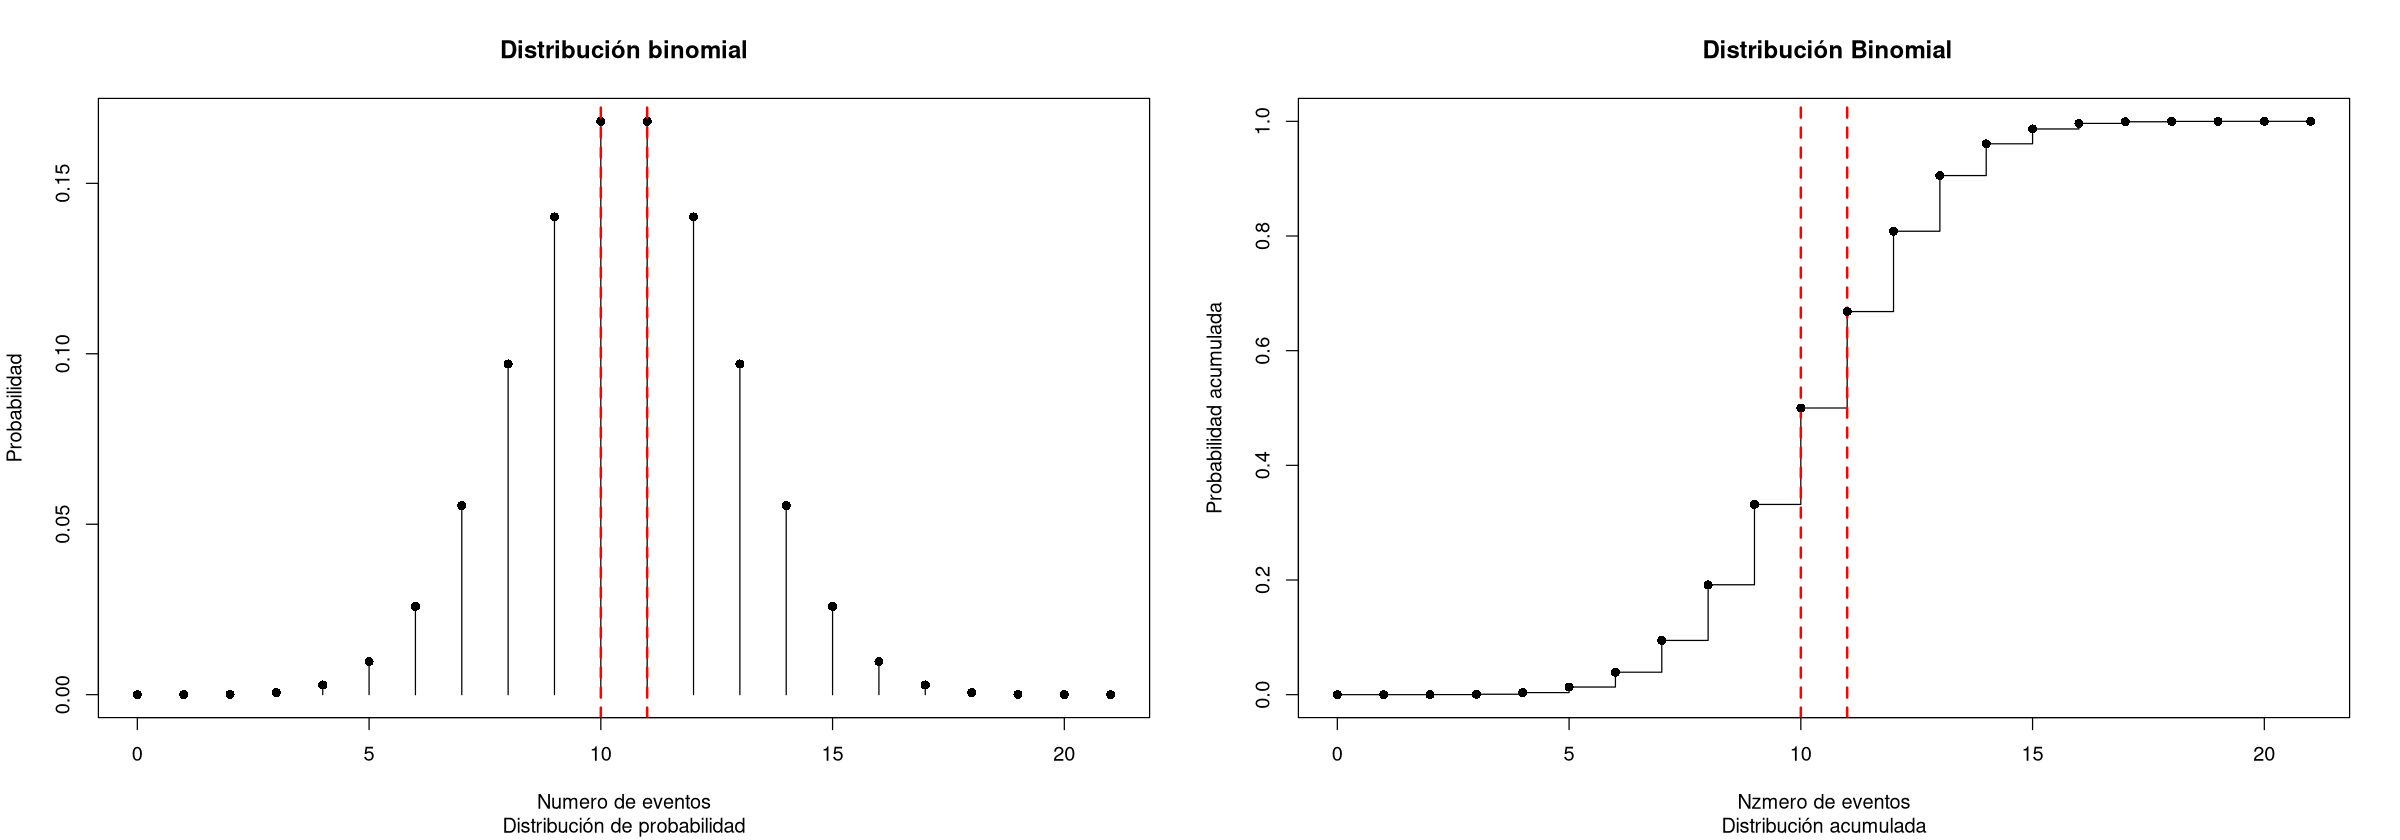

In [14]:
options(repr.plot.width=20, repr.plot.height=7)
par(mfrow = c(1,2))
plot(x, dbinom(x, size=n, prob=p), xlab="Numero de eventos",
     ylab="Probabilidad", main="Distribución binomial", type="h",
     sub = 'Distribución de probabilidad')
points(x, dbinom(x, size=n, prob=p), pch=16, col=1)
abline(v=c(10,11), col='red', lty=2, lwd = 2)
x <- rep(x, rep(2, length(x)))
plot(x[-1], pbinom(x, size=n, prob=p)[-length(x)], xlab="Nzmero de eventos",
     ylab="Probabilidad acumulada", main=" Distribución Binomial", type="l",
     sub = 'Distribución acumulada')
abline(v=c(10,11), col='red', lty=2, lwd = 2)
x <- 0:n
points(x, pbinom(x, size=n, prob=p), pch=16)

## **Test del signo y test de Wilcoxon**

Son como la generalización de la prueba t de Student para diferencia de medias libre de supuestos distribucionales. Recuerde que la estadística t tiene la siguiente forma:

$$t = \frac{\bar{X} - \mu_0}{S / \sqrt{n}}$$

siempre que sepamos que nuestra población tiene distribución normal.

**Nota:** Generalmente las distribuciones $F$, $\chi^2$, normal y t de Student son utilizadas para generar inferencia.

### Test del signo:

- Una prueba de hipotésis para la mediana.

- Se tiene una muestra $X_1, X_2, \cdots, X_n$ aleatoria de $X$.

- El sistema de hipotésis puede quedar conformado de las siguientes formas:

$$
\begin{array}{ccc}
\begin{cases}
  H_0: \theta = \theta_0  \\
  H_1: \theta \neq \theta_0 
\end{cases} 
& \quad
\begin{cases}
  H_0: \theta = \theta_0  \\
  H_1: \theta \leq \theta_0 
\end{cases} 
& \quad
\begin{cases}
  H_0: \theta = \theta_0  \\
  H_1:  \theta \geq \theta_0  
\end{cases}
\end{array}
$$

> **PREGUNTA:** En el caso de presentarse varias medianas qué hariámos???? En teoría no hay problema porque si postulamos $H_0$ como la mediana y es al menos una de las medianas de la variable la prueba no debería verse afectada por las demás medianas reales de la distribución.


Si definimos la variable aleatoria $Y = X - \theta$ entonces el sistema de hipotésis toma la **forma alternativa**:

$$\begin{cases} H_0: \theta_y = 0 \\ H_1: \theta_y  \not= 0\end{cases}$$

En donde si definimos la variable:

$$ \psi_i =
\begin{cases}
1 & Y_i > 0 \\
0 & Y_i < 0
\end{cases}$$


Bajo $H_0$ (La mediana se corresponde con $\theta_0$) se tendrá que $P(\psi_i = 1) = \frac{1}{2}$ o lo que es lo mismo:

$$S = \sum_{i = 1}^n \psi_i \sim Bin(n, \frac{1}{2})$$

que nos servirá como estadística de prueba para la mediana.

#### Región de rechazo:

- Para $H_1: \theta_y > 0$ se rechaza si $S \geq binom_{(1- \alpha, n, \frac{1}{2})}$
- Para $H_1: \theta_y < 0$ se rechaza si $S \leq n - binom_{(1- \alpha, n, \frac{1}{2})}$ (Cola izquierda)
- Para $H_1: \theta_y \not= 0$ se rechaza si $S \geq binom_{(1- \alpha, n, \frac{1}{2})}$ o $S \leq n - binom_{(1- \alpha, n, \frac{1}{2})}$

**Nota:** Se puede aproximar a la binomial con una normal en esta prueba.

In [23]:
# Tabla de valores de significancia (Prueba de dos colas):
n=15; p=.5
t(cbind('s' = 0:n, 'P(S <= s)' = round(pbinom(0:n, n, p) ,2), 
        'P(S >= s)' = round(pbinom(x-1, n, p, lower.tail=FALSE) ,2)))

s,0,1,2,3.00,4.00,5.00,6.00,7.0,8.0,9.00,10.00,11.00,12.00,13,14,15
P(S <= s),0,0,0,0.02,0.06,0.15,0.30,0.5,0.7,0.85,0.94,0.98,1.00,1,1,1
P(S >= s),1,1,1,1.00,0.98,0.94,0.85,0.7,0.5,0.30,0.15,0.06,0.02,0,0,0


> **Nota:** Uno de los mayores inconvenientes de esta prueba es que el nivel de significancia no puede definirse como normalmente se hace sino que en cambio se tiene como una lista predefinida de posibles valores de significancia para nuestra prueba. Así, por ejemplo, para las pruebas de dos colas si $S \geq 11$ o si $S \leq 4$ el nivel de significancia de la prueba será 12%.

Adicionalmente, recordando los resultados del teorema central del límite: 
- Si $X_1,X_2, \cdots, X_n$ es una muestra aleatoria de $X$ con distribución $P(X \leq x)$ entonces:

    - $\sum_{j = 1}^{n} X \overset{\small{n \to  \infty}}{\,\,\,\sim\,\,\,} N \left( E(\sum_{j = 1}^{n} X), V(\sum_{j = 1}^{n} X)\right)$ y su versión estandarizada.
    - $\bar{X} \overset{\small{n \to \infty}}{\,\,\,\sim\,\,\,} N(E(\bar{X}), V(\bar{X}))$ y su versión estandarizada.
 

- Si $\psi_1, \psi_2, \cdots, \psi_n$ es una muestra aleatoria de $\Psi \sim Bernoulli(1/2)$ entonces:

    - $S = \sum_{i=1}^{n} \psi_i \overset{\small{n \to \infty}}{\sim} N\left(\frac{n}{2}, \frac{n}{4}\right)$ y su versupon estandarizada.
    - $S/n \overset{\small{n \to \infty}}{\sim} N\left(\frac{1}{2}, \frac{1}{4n}\right)$ y su versión estandarizada.

Son resultados que se pueden aplicar para conseguir IC o valores p de esta prueba.